In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("library_occupancy_data.csv")
df.head()

,Date,Time,Mann,Olin,Uris,Math,DayOfWeek
0,10/5/25,4:08 PM,195.0,670.0,361.0,354.0,Sunday
1,10/5/25,7:09 PM,114.0,562.0,248.0,102.0,Sunday
2,10/5/25,8:49 PM,144.0,588.0,181.0,0.0,Sunday
3,10/6/25,9:13 AM,57.0,205.0,140.0,60.0,Monday
4,10/6/25,1:12 PM,403.0,294.0,281.0,223.0,Monday


In [20]:
# convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.time
df.head()

C:\Users\xinya\AppData\Local\Temp\ipykernel_15704\859455817.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Time,Mann,Olin,Uris,Math,DayOfWeek
0,2025-10-05,16:08:00,195.0,670.0,361.0,354.0,Sunday
1,2025-10-05,19:09:00,114.0,562.0,248.0,102.0,Sunday
2,2025-10-05,20:49:00,144.0,588.0,181.0,0.0,Sunday
3,2025-10-06,09:13:00,57.0,205.0,140.0,60.0,Monday
4,2025-10-06,13:12:00,403.0,294.0,281.0,223.0,Monday


In [29]:
library_cols = ['Mann', 'Olin', 'Uris', 'Math']

# total and average occupancy per library
print("total occupancy")
print(df[library_cols].sum().sort_values(ascending=False))

print("average occupancy")
print(df[library_cols].mean().round(2))

total occupancy
Olin    26093.0
Uris    14407.0
Mann     9633.0
Math     5907.0
dtype: float64
average occupancy
Mann    120.41
Olin    326.16
Uris    180.09
Math     73.84
dtype: float64


In [ ]:
# find when libraries are the busiest
# by day of week
avg_by_day = df.groupby('DayOfWeek')[library_cols].mean()
print(avg_by_day)

# by time of day
avg_by_time = df.groupby('Time')[library_cols].mean()
print(avg_by_time.head())

# Convert time to number of hours (e.g., 13.5 for 1:30 PM)
df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour + (pd.to_datetime(df['Time'].astype(str)).dt.minute / 60)

bins = np.arange(8, 25, 2)
labels = [f"{int(b):02d}:00-{int(b+2)%24:02d}:00" for b in bins[:-1]]
df['TimeInterval'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

# Group by the 2-hour intervals
avg_by_interval = df.groupby('TimeInterval')[library_cols].mean()
print(avg_by_interval)

                 Mann        Olin        Uris       Math
DayOfWeek                                               
Friday     111.727273  137.909091  186.272727  84.000000
Monday     132.000000  348.636364  200.818182  99.727273
Saturday    47.000000  164.750000  156.916667   0.000000
Sunday     109.777778  426.555556  201.333333  93.555556
Thursday    93.181818  409.090909  150.545455  67.909091
Tuesday    169.846154  366.307692  185.846154  95.000000
Wednesday  166.692308  435.615385  183.230769  81.692308
           Mann   Olin   Uris  Math
Time                               
08:21:00   98.0  121.0   84.0   0.0
09:13:00   57.0  205.0  140.0  60.0
09:31:00   36.0   71.0   42.0  16.0
09:40:00  110.0  322.0  110.0  42.0
09:53:00  127.0  147.0   93.0  56.0
                    Mann        Olin        Uris        Math
TimeInterval                                                
08:00-10:00    84.000000  179.000000   96.833333   37.833333
10:00-12:00    66.000000  192.200000  113.200000   4

C:\Users\xinya\AppData\Local\Temp\ipykernel_15704\320645820.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour + (pd.to_datetime(df['Time'].astype(str)).dt.minute / 60)
C:\Users\xinya\AppData\Local\Temp\ipykernel_15704\320645820.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour + (pd.to_datetime(df['Time'].astype(str)).dt.minute / 60)
C:\Users\xinya\AppData\Local\Temp\ipykernel_15704\320645820.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

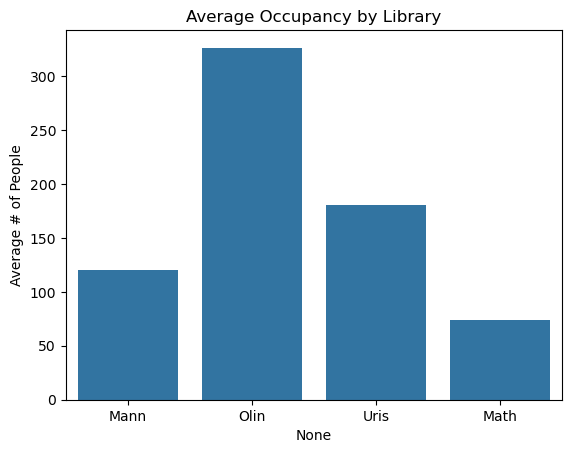

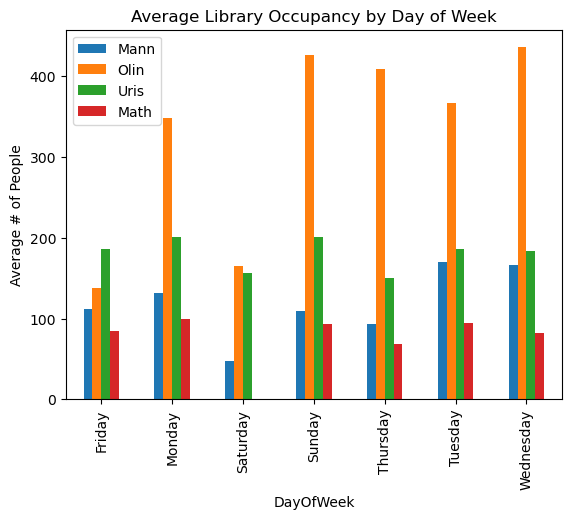

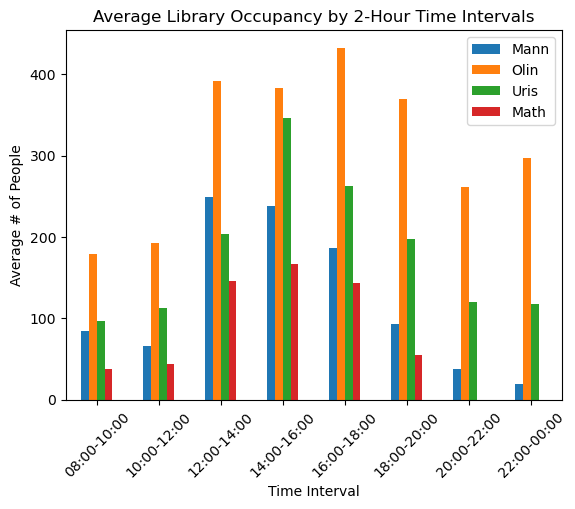

In [37]:
# average occupancy by library
avg_total = df[library_cols].mean()
sns.barplot(x=avg_total.index, y=avg_total.values)
plt.title("Average Occupancy by Library")
plt.ylabel("Average # of People")
plt.show()

# average occupancy by day of week
avg_by_day.plot(kind='bar')
plt.title("Average Library Occupancy by Day of Week")
plt.ylabel("Average # of People")
plt.show()

# average occupancy by time of day
avg_by_interval.plot(kind='bar')
plt.title("Average Library Occupancy by 2-Hour Time Intervals")
plt.ylabel("Average # of People")
plt.xlabel("Time Interval")
plt.xticks(rotation=45)
plt.show()

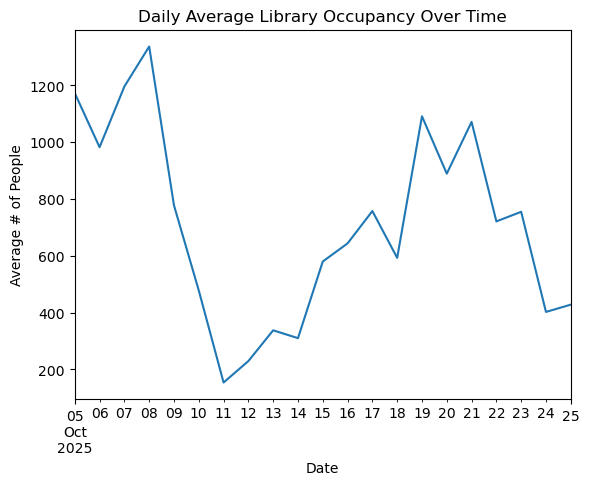

In [42]:
# Daily total across all libraries
df['Total'] = df[library_cols].sum(axis=1)
daily_total = df.groupby('Date')['Total'].mean()

plt.figure()
daily_total.plot()
plt.title("Daily Average Library Occupancy Over Time")
plt.ylabel("Average # of People")
plt.xlabel("Date")
plt.show()

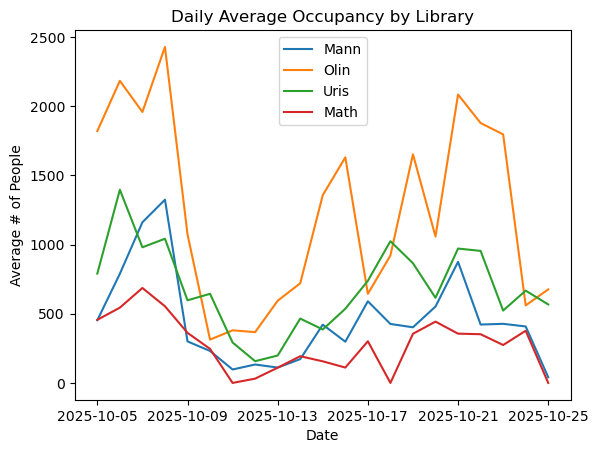

In [41]:
daily_total = df.groupby('Date')[library_cols].sum().reset_index()

plt.figure()
for lib in library_cols:
    plt.plot(daily_total['Date'], daily_total[lib], label=lib)

plt.title("Daily Average Occupancy by Library")
plt.xlabel("Date")
plt.ylabel("Average # of People")
plt.legend()
plt.show()